In [6]:
from copy import copy
import numpy as np
import torch
import matplotlib.pyplot as plt

In [7]:
# Load the numpy data from a file, convert to a PyTorch tensor with shape (C, H, W) isntead of (H, W, C)
data = np.load("data0.npy")
data = np.moveaxis(data, -1, 0)
data = torch.from_numpy(data)
print(data[359])

# Print the shape and data type of the loaded array
print("Shape:", data.shape)
print("Data type:", data.dtype)

tensor([[0.7998, 0.2406, 0.6233,  ..., 0.3696, 0.3375, 0.4635],
        [0.6189, 0.5407, 0.3535,  ..., 0.3006, 0.3444, 0.4886],
        [0.5556, 0.5495, 0.4295,  ..., 0.2702, 0.2113, 0.3014],
        ...,
        [0.5274, 0.4997, 0.4500,  ..., 0.7816, 0.4751, 0.5819],
        [0.5177, 0.3599, 0.4900,  ..., 0.5739, 0.5669, 0.7593],
        [0.1017, 0.4253, 0.7993,  ..., 0.9388, 0.5832, 0.5352]])
Shape: torch.Size([442, 302, 261])
Data type: torch.float32


tensor(359)


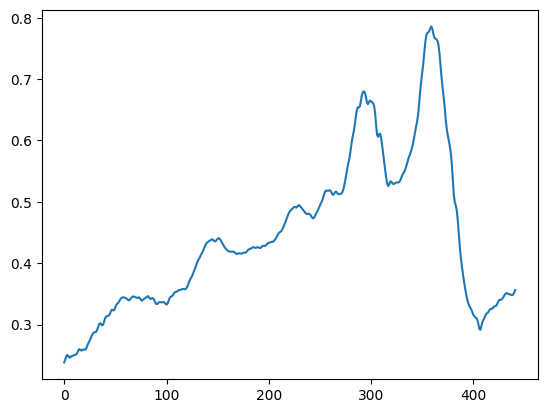

In [8]:
mean_pixel_value_every_dimension = torch.mean(data, (1, 2))

plt.plot(mean_pixel_value_every_dimension)

max_index_of_max_pixel_val = torch.argmax(mean_pixel_value_every_dimension)

print(max_index_of_max_pixel_val)

In [9]:
#int_number_feature -> Anzahl der Wellenzahlen./Channel
#tiny ist ein kleiner floating point(1e-9 bei mir) gegen Zero-division ect.
#Bei max_wavenumber müsst ihr wie besprochen den Peak der Amid1-Bande angeben.
#Mit dem Integral müsst ihr schauen ob es so bei euch passt. Orientiert euch einfach dabei an den Masken.

def Normalize_spectral_data(image, int_number_feature, max_wavenumber=224, max_integral=100, tiny=1e-9):
	img = copy(image)
	min_values, _  = torch.min(image, 0)
	max_ratio = 1 / (img[max_wavenumber, :, :] - min_values + tiny)
	#print(max_ratio)
	for wavenumber in range(int_number_feature):
		img[wavenumber, :, :] = (img[wavenumber, :, :] - min_values) * max_ratio

	mask_bad_spectra = torch.trapz(img, dim=0) > max_integral
	img[:, mask_bad_spectra] = tiny

	return img.float()


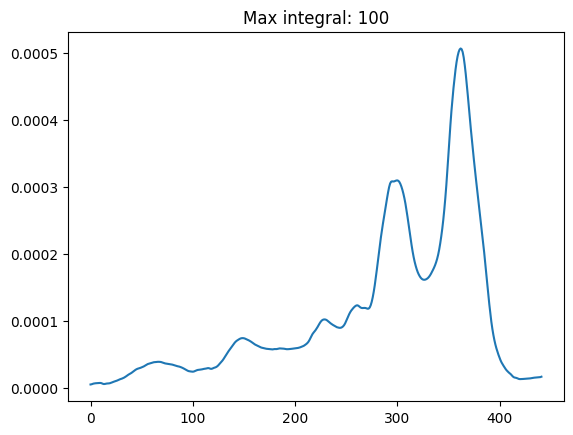

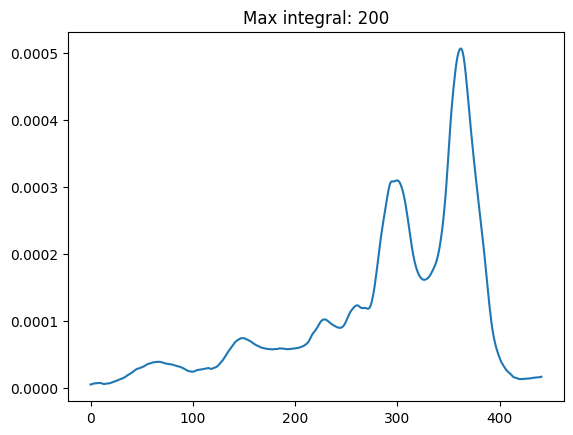

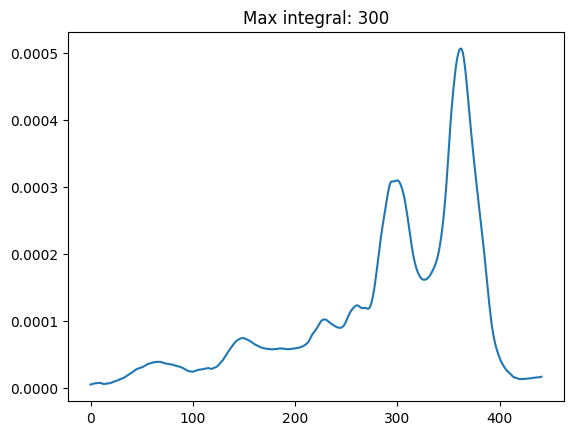

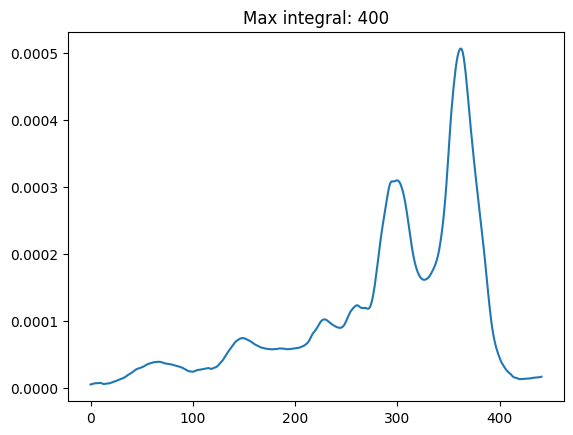

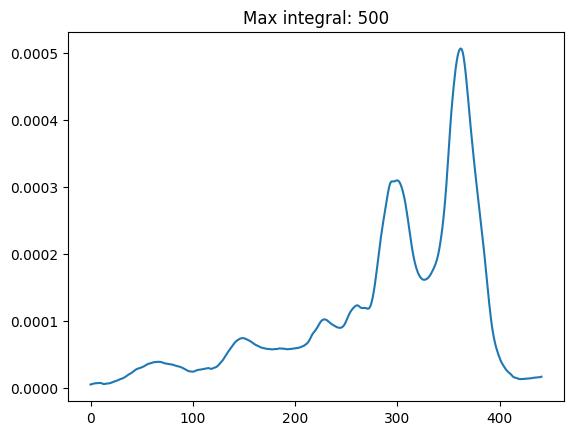

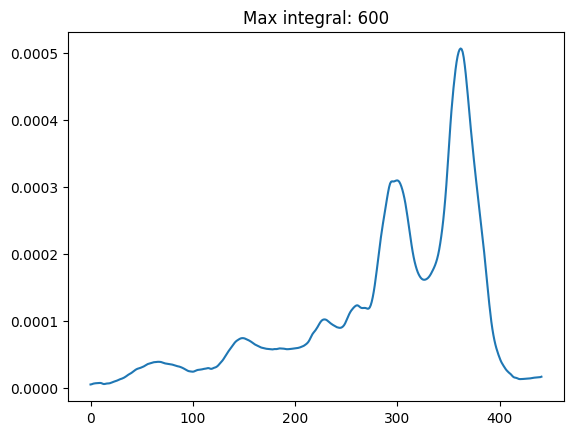

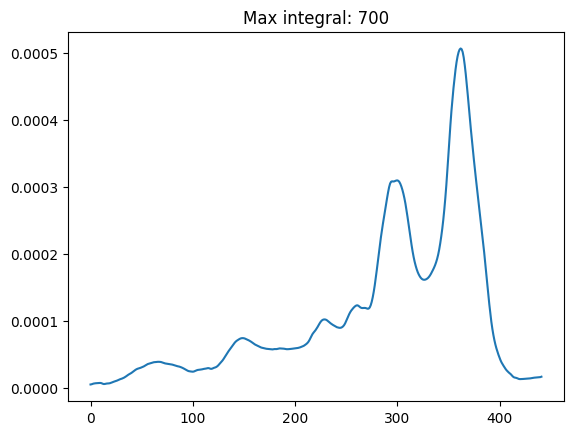

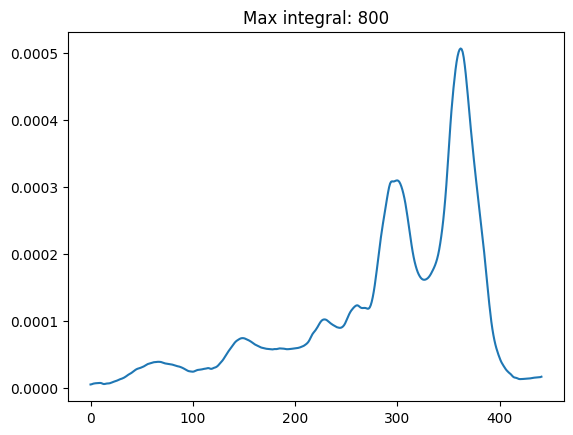

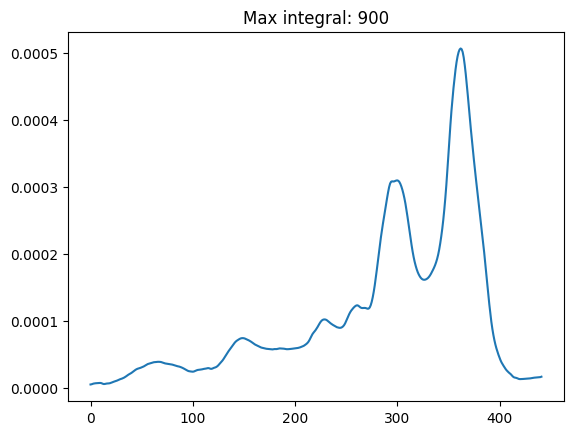

In [10]:
for i in range(100, 1000, 100):
	img = Normalize_spectral_data(image=data, int_number_feature=442, max_wavenumber=max_index_of_max_pixel_val, max_integral=i)
	plt.figure()
	plt.title(f"Max integral: {i}")
	plt.plot(torch.mean(img, (1, 2)))